In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [148]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [149]:
from glob import glob

In [150]:
times = {}
for fname in glob('*/*_time.csv'):
    times[fname] = (pd.read_csv(fname)['time'][0])

In [151]:
df = pd.Series(times).to_frame('time')

df = \
df.index \
    .str.extract('(\d+)/sim_(\w+)_time.csv', expand=True) \
    .rename(columns={0: 'samples', 1: 'method'}) \
    .set_index(df.index) \
    .join(df)
    
df['genes'] = df.method.map({'spatialde': int(1e4), 'stan': int(1e2)})
df['multiplier'] = 1e4 / df.genes
df['corrected_time'] = df['time'] * df['multiplier']

df['method'] = df['method'].map({'spatialde': 'SpatialDE', 'stan': 'Stan'})

In [152]:
df

,samples,method,time,genes,multiplier,corrected_time
100/sim_spatialde_time.csv,100,SpatialDE,80.285671,10000,1.0,8.028567e+01
100/sim_stan_time.csv,100,Stan,5.049000,100,100.0,5.049000e+02
1000/sim_spatialde_time.csv,1000,SpatialDE,152.574598,10000,1.0,1.525746e+02
1000/sim_stan_time.csv,1000,Stan,1865.586554,100,100.0,1.865587e+05
2000/sim_spatialde_time.csv,2000,SpatialDE,331.892123,10000,1.0,3.318921e+02
2000/sim_stan_time.csv,2000,Stan,15683.031597,100,100.0,1.568303e+06
250/sim_spatialde_time.csv,250,SpatialDE,87.384402,10000,1.0,8.738440e+01
250/sim_stan_time.csv,250,Stan,48.649344,100,100.0,4.864934e+03
500/sim_spatialde_time.csv,500,SpatialDE,100.776454,10000,1.0,1.007765e+02
500/sim_stan_time.csv,500,Stan,277.180977,100,100.0,2.771810e+04


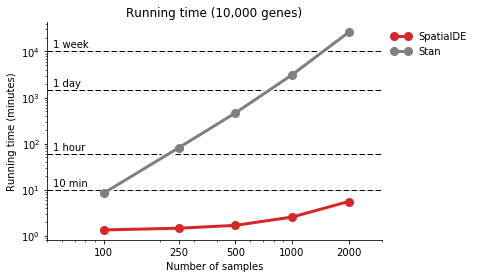

In [199]:
figsize(6, 4)

plt.yscale('log')
plt.xscale('log')
colors = {'SpatialDE': 'tab:red', 'Stan': 'tab:grey'}
for method, g in df.groupby('method'):
    g = g.sort_values('time')
    plt.plot(g.samples, g.corrected_time / 60, lw=6, color='w', label='')
    plt.plot(g.samples, g.corrected_time / 60,
             marker='.', label=method, lw=3, ms=16, color=colors[method]);
    
plt.legend(numpoints=2, bbox_to_anchor=(1, 1), frameon=False);

plt.axhline(10, lw=1, c='k', zorder=0, ls='--');
# plt.annotate('10 min', (-300, 10 / 1.4), va='top')
plt.annotate('10 min', (54, 10 * 1.1), va='bottom')
plt.axhline(60, lw=1, c='k', zorder=0, ls='--');
# plt.annotate('1 hour', (-300, 60 / 1.4), va='top')
plt.annotate('1 hour', (54, 60 * 1.1), va='bottom')
plt.axhline(60 * 24, lw=1, c='k', zorder=0, ls='--');
# plt.annotate('1 day', (-300, 60 * 24 / 1.4), va='top')
plt.annotate('1 day', (54, 24 * 60 * 1.1), va='bottom')
plt.axhline(60 * 24 * 7, lw=1, c='k', zorder=0, ls='--');
# plt.annotate('1 week', (-300, 60 * 24 * 7  / 1.4), va='top')
plt.annotate('1 week', (54, 7 * 24 * 60 * 1.1), va='bottom')

plt.xlabel('Number of samples');
plt.ylabel('Running time (minutes)');

# plt.xlim(-400, 2100);
plt.xlim(50, 3000);
plt.xticks([100, 250, 500, 1000, 2000], [100, 250, 500, 1000, 2000]);
plt.title('Running time (10,000 genes)');

plt.savefig('performance.pdf', bbox_inches='tight')

In [200]:
df.to_csv('performance.csv')